<a href="https://colab.research.google.com/github/chalarm1405/DWDM21_/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [95]:
import pandas as pd

In [96]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import os

In [98]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [99]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [100]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [101]:
gen_exams('623021045-9')

รหัสนักศึกษา 623021045-9 ทำข้อ 3 และ 0


#ข้อที่ 0 หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด

In [154]:
table_1and2 = flights.merge(airports,how='left', left_on='รหัสสนามบินปลายทาง',right_on='รหัสสนามบิน') #รวมตาราง flights และ airports

In [155]:
table_1and2

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,13303,Miami,FL,Miami International
1,19,5,DL,14869,12478,0,-8,12478,New York,NY,John F. Kennedy International
2,19,5,DL,14057,14869,-4,-15,14869,Salt Lake City,UT,Salt Lake City International
3,19,5,DL,15016,11433,28,24,11433,Detroit,MI,Detroit Metro Wayne County
4,19,5,DL,11193,12892,-6,-11,12892,Los Angeles,CA,Los Angeles International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,14869,Salt Lake City,UT,Salt Lake City International
2702214,19,6,DL,10397,13495,-2,-3,13495,New Orleans,LA,Louis Armstrong New Orleans International
2702215,19,6,DL,10140,10397,18,9,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702216,19,6,DL,10397,13244,10,7,13244,Memphis,TN,Memphis International


In [156]:
table_1and2.isnull() #ดูว่าข้อมูลนั้นมี Missing รึป่าว

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2702213,False,False,False,False,False,False,False,False,False,False,False
2702214,False,False,False,False,False,False,False,False,False,False,False
2702215,False,False,False,False,False,False,False,False,False,False,False
2702216,False,False,False,False,False,False,False,False,False,False,False


In [157]:
table_1and2.isnull().any() #สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing ไหม

วันในเดือน            False
วันในสัปดาห์          False
สายการบิน             False
รหัสสนามบินต้นทาง     False
รหัสสนามบินปลายทาง    False
ความล่าช้าขาออก       False
ความล่าช้าขาเข้า      False
รหัสสนามบิน           False
เมือง                 False
รัฐ                   False
ชื่อสนามบิน           False
dtype: bool

In [158]:
max = table_1and2.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False)   #จัดกลุ่มรัฐจากนั้นนับโดยใช้คำสั่ง countและจัดเรียงตามรหัสสนามบินปลายทาง 
max.iloc[:1,4:5]

,รหัสสนามบินปลายทาง
รัฐ,
CA,380429


สายการบินที่มีค่าจำนวนเครื่องบินขาเข้ามากที่สุด คือ รัฐ CA ขาเข้าอยู่ที่ 380429	

In [166]:
min = table_1and2.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False)
min.iloc[35:,4:5]

,รหัสสนามบินปลายทาง
รัฐ,
AK,7711


สายการบินที่มีค่าจำนวนเครื่องบินขาเข้ามากที่สุด คือ รัฐ AK ขาเข้าอยู่ที่ 7711	

#ข้อที่3 สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด

In [108]:
table_1and2.groupby('สายการบิน').count()

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
9E,80031,80031,80031,80031,80031,80031,80031,80031,80031,80031
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
AS,68555,68555,68555,68555,68555,68555,68555,68555,68555,68555
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
F9,35738,35738,35738,35738,35738,35738,35738,35738,35738,35738
FL,92702,92702,92702,92702,92702,92702,92702,92702,92702,92702
HA,17432,17432,17432,17432,17432,17432,17432,17432,17432,17432


In [109]:
data = table_1and2.groupby('สายการบิน').count().sort_values(by=['วันในเดือน'],ascending=False)
data

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
WN,575739,575739,575739,575739,575739,575739,575739,575739,575739,575739
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
UA,286418,286418,286418,286418,286418,286418,286418,286418,286418,286418
US,233321,233321,233321,233321,233321,233321,233321,233321,233321,233321
OO,160164,160164,160164,160164,160164,160164,160164,160164,160164,160164
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
MQ,113212,113212,113212,113212,113212,113212,113212,113212,113212,113212


In [110]:
max = data.iloc[:1,:1]
max

,วันในเดือน
สายการบิน,
WN,575739


สายการบินที่มีเที่ยวบินมากที่สุด คือ สายการบิน WN

In [111]:
min = data.iloc[15:16,:1]
min

,วันในเดือน
สายการบิน,
HA,17432


สายการบินที่มีเที่ยวบินน้อยที่สุด คือ สายการบิน HA

#ข้อที่ต้องคิดเอง
#จากไฟล์ข้อมูล flights จงวาดกราฟ box plot ดพื่อตรวจสอบข้อมูลของ ความล่าช้าขาออกและความล่าช้าขาเข้า


In [112]:
flights.iloc[:,4:8]

,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,13303,-3,1
1,12478,0,-8
2,14869,-4,-15
3,11433,28,24
4,12892,-6,-11
...,...,...,...
2702213,14869,1,-3
2702214,13495,-2,-3
2702215,10397,18,9
2702216,13244,10,7


In [113]:
flights_1 = flights.iloc[:,5:8]

In [114]:
flights_1

,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,-3,1
1,0,-8
2,-4,-15
3,28,24
4,-6,-11
...,...,...
2702213,1,-3
2702214,-2,-3
2702215,18,9
2702216,10,7


In [115]:
from matplotlib import pyplot as plt

In [116]:
flights_1['ความล่าช้าขาออก'] [1:]

1           0
2          -4
3          28
4          -6
5          -1
           ..
2702213     1
2702214    -2
2702215    18
2702216    10
2702217     0
Name: ความล่าช้าขาออก, Length: 2702217, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f9460fb5590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9460fbb650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9460fc4690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9460fc4150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9460fb5b90>,
  <matplotlib.lines.Line2D at 0x7f9460fbb110>]}

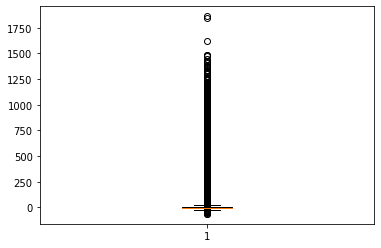

In [117]:
plt.boxplot(flights_1['ความล่าช้าขาออก'] [1:])

In [118]:
flights_1['ความล่าช้าขาเข้า'] [1:]

1          -8
2         -15
3          24
4         -11
5         -19
           ..
2702213    -3
2702214    -3
2702215     9
2702216     7
2702217   -13
Name: ความล่าช้าขาเข้า, Length: 2702217, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f9460f289d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9460f2ea10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9460f33a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9460f33510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9460f28f50>,
  <matplotlib.lines.Line2D at 0x7f9460f2e4d0>]}

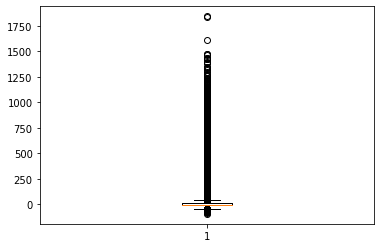

In [119]:
plt.boxplot(flights_1['ความล่าช้าขาเข้า'] [1:])